In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.constants import R_jup, R_sun, R_earth, au, M_sun
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from numpy import pi
from scipy import optimize

import bateman as bt
import thermalizationnew as th
import heat_new2 as ht
#import thermalization as th
#import heat as ht

kb =1.38064852e-16
h = 6.6266885e-27
c = 2.99792458e10
eV = 1.60218e-12
MeV = 1.0e6*eV
me = 9.10938356e-28
e = 4.803204e-10
mu = 1.66054e-24
day = 86400.
Msun = 1.9885e33

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
#fkappa = pd.read_csv('effective_kappa_A141_238.dat',delim_whitespace=True,header=None)
fkappa = pd.read_csv('effective_kappa_A85_238.dat',delim_whitespace=True,header=None)
#fkappa = pd.read_csv('effective_kappa_141_238.dat',delim_whitespace=True,header=None)

kappa_effs = 0.02*np.ones((240,100))
for i in range(0,len(fkappa)):
    A = fkappa[0][i]
    Z = fkappa[1][i]
    kappa = fkappa[3][i]
    kappa_effs[A][Z] = kappa
#    print A, Z, kappa_effs[A][Z]

ffraction = pd.read_csv('each_ejecta_A238_lod.dat',delim_whitespace=True,header=None)

In [12]:
##########Start input parameters
Amin = 88
Amax = 238

##########ejecta parameters for thermalization
Mej = 0.06*Msun
vej = 0.1*c
n = 4.5
alpha_max = 4.0#v_max = alpha_max * vej
alpha_min = 1.#v_min = alpha_min * vej


In [56]:
tmp = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)

total time step =  44


In [25]:
ffission_A = []
ffission_X =[]
ffission_A.append(254)
ffission_X.append(2.0e-6)

In [26]:
tmp_f = ht.calc_heating_rate_sf(Mej,vej, Amin,Amax,ffraction,ffission_A,ffission_X,kappa_effs,alpha_max,alpha_min,n)

total time step =  49


In [57]:
data = {'t':tmp['t'],'total':tmp['total'],'gamma':tmp['gamma'], 'electron':tmp['electron'], 'gamma_th':tmp['gamma_th'],'electron_th':tmp['electron_th']}
df = pd.DataFrame(data=data)
df.to_csv('heat141_238_M001_v04_v1_n45.dat',sep=" ",index=False,header=None,columns=['t', 'total', 'gamma', 'electron','gamma_th','electron_th'])

In [6]:
th.calc_thermalization_time(1.,Mej,vej,100.,alpha_max,alpha_min,n)

0.028266581038716817


1623097.6291441652

In [10]:
katz_M005_v01_A88_238 = ht.calc_Katz_integral_timeseries(Mej,data)
print ht.calc_Katz_integral(Mej,data,13.5)#,ht.calc_Katz_integral(Mej,data003,13.5)

6.255118572464806e+42


In [11]:
fEran = pd.read_csv('../light_curve/Katz_integral_GW170817_Eran.dat',delim_whitespace=True,header=None)
fVLT = pd.read_csv('../light_curve/Katz_integral_GW170817_VLTKs.dat',delim_whitespace=True,header=None)
fSP = pd.read_csv('../light_curve/Katz_integral_GW170817_Spitzer.dat',delim_whitespace=True,header=None)

No handlers could be found for logger "matplotlib.legend"


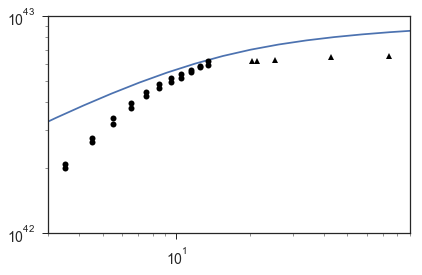

In [13]:
sns.set(style='ticks',font_scale=1.4)

fig, ax = plt.subplots(figsize=(6.472135955, 4))
ax.loglog()
plt.xlim(3,90.)
plt.ylim(1.0e42,1.0e43)


#plt.ylim(1.0e53,1.0e55)
#ax.plot(np.multiply(ttt2s,1./day),np.multiply(integ2s,0.01*Msun),label=r'0.05M$_{\rm sun}$')
#ax.plot(np.multiply(ts,1./day),np.multiply(integs,0.01*Msun),label=r'0.04M$_{\rm sun}$',linestyle='-')
#ax.plot(katz_M005_v02_A90_238['t'],katz_M005_v02_A90_238['katz'],linestyle=':')
#ax.plot(katz_M005_v01_A90_238['t'],katz_M005_v01_A90_238['katz'],linestyle=':')
ax.plot(katz_M005_v01_A88_238['t'],katz_M005_v01_A88_238['katz'],linestyle='-')
#ax.plot(katz_M005_v02_A88_238['t'],katz_M005_v02_A88_238['katz'],linestyle='-.')
#ax.plot(np.multiply(ttts,1./day),np.multiply(integ2_003_01_88_238,0.03*Msun),label=r'0.03M$_{\rm sun}$')
#ax.plot(np.multiply(ttts,1./day),np.multiply(integ2s,Mej))
ax.plot(fEran[0],fEran[1],'o',color='k',markersize=6,label='')
ax.plot(fEran[0],fEran[2],'o',color='k',markersize=6,label='')
ax.plot(fVLT[0],fVLT[1],'^',color='k',markersize=6,label='')
ax.plot(fSP[0],fSP[1],'^',color='k',markersize=6,label='')
plt.legend(loc='lower right',fontsize=10.5)
#plt.savefig("Katz_v01_04_n4_A88_238.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
katz_M004_01c_n4 = []
for i in range(70,len(katz_M004_01c_n10)):
    katz_M004_01c_n4.append(katz_M004_01c_n10[i])
katz_M004_01c_n4[0]

In [14]:
Amins = []
katz_M006_01c_n45 = []
for Amin in range(70,140):
    tmp = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)
    katz = ht.calc_Katz_integral(Mej,tmp,12.5)
    print Amin, katz
    Amins.append(Amin)
    katz_M006_01c_n45.append(katz)

total time step =  44
70 8.48281721887e+42
total time step =  44
71 8.7890330574e+42
total time step =  44
72 8.87397812172e+42
total time step =  44
73 3.66745726677e+42
total time step =  44
74 3.64674843168e+42
total time step =  44
75 4.00627584908e+42
total time step =  44
76 4.08962924404e+42
total time step =  44
77 4.34879308198e+42
total time step =  44
78 3.57847207213e+42
total time step =  44
79 3.29938551523e+42
total time step =  44
80 3.42773625402e+42
total time step =  44
81 4.51610795335e+42
total time step =  44
82 4.72636023897e+42
total time step =  44
83 5.11132482529e+42
total time step =  44
84 5.29960929551e+42
total time step =  44
85 7.09296536412e+42
total time step =  44
86 7.56124514542e+42
total time step =  44
87 7.72130795934e+42
total time step =  44
88 7.76514876262e+42
total time step =  44
89 7.07542182231e+42
total time step =  44
90 7.06180167074e+42
total time step =  44
91 7.62997206154e+42
total time step =  44
92 7.56641632937e+42
total time s

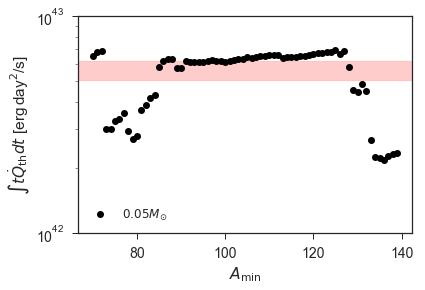

In [17]:
sns.set(style='ticks',font_scale=1.4)
plt.ylim(1.0e42,1.0e43)
plt.axhspan(5.0e42,6.2e42, alpha=0.2, color='r')
plt.ylabel(r"$\int t\dot{Q}_{\rm th}dt$ [erg$\,$day$^2$/s]")
plt.xlabel(r"$A_{\rm min}$")
#plt.semilogy(Amins,katz_M005_01c,'o',color='k',label=r'$0.05M_{\odot}$')
plt.semilogy(Amins,katz_M005_01c_n4,'o',color='k',label=r'$0.05M_{\odot}$')
plt.savefig("Katz_integral_n4_alphamin1_alphamax4_day.pdf",dpi=600,bbox_inches='tight')
plt.legend(loc='lower left',fontsize=12.)
plt.show()

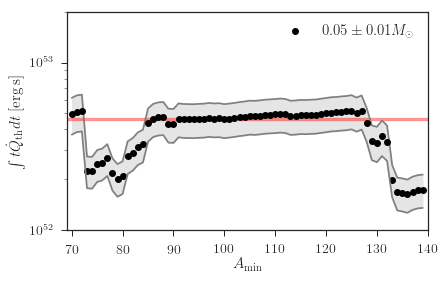

In [41]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
ax.semilogy()
plt.xlim(69,140)
plt.ylim(1.0e52,2.0e53)
plt.axhspan(6.0e42*day*day,6.2e42*day*day, alpha=0.4, color='r')
plt.ylabel(r"$\int t\dot{Q}_{\rm th}dt~[{\rm erg\,s}]$")
plt.xlabel(r"$A_{\rm min}$")
ax.plot(Amins,np.multiply(katz_M006_01c_n4,day*day),color='grey')
ax.plot(Amins,np.multiply(katz_M005_01c_n4,day*day),'o',color='k',label=r'$0.05\pm 0.01M_{\odot}$')
ax.plot(Amins,np.multiply(katz_M004_01c_n4,day*day),color='grey')
ax.fill_between(Amins,np.multiply(katz_M004_01c_n4,day*day) , np.multiply(katz_M006_01c_n4,day*day),alpha=0.2,color='gray')
plt.legend(loc='best',fontsize=15.)
plt.savefig("Katz_integral_n4_alphamin1_alphamax4_v2.pdf",dpi=600,bbox_inches='tight')

plt.show()

In [15]:
data_K = {'Amin':Amins,'Katz':katz_M006_01c_n45}
df = pd.DataFrame(data=data_K)
df.to_csv('Katz_Amin_M006_v01_n45_alphamin1_alphamax4.dat',sep=" ",index=False,header=None,columns=['Amin', 'Katz'])

In [ ]:
def tmf(x):
    return 1.0e5*np.power(x/100.,-2.9)

xs = []
ys = []
x = 10.
while(x<1000.):
    y = tmf(x)
    xs.append(x)
    ys.append(y)
    x *= 1.2

In [ ]:
ntau = -0.1
atau1 = 1.0
atau2 = 2.0
atau15 = 1.5
def epsilon_tau1(tau0,tau):
    x = tau/tau0
    pp = -2.+atau1*(1.-ntau)
    ppp = 1./(1.-ntau)
    tmp = np.power(tau0,-atau1*(1.-ntau))*(1.-ntau)/(atau1*(-ntau+1.)-2.)*(np.power(tau,pp)-np.power(tau0,pp))
    tmpp =  np.power(x,-atau1*(1.-ntau))*(1. - tmp)
    print tmpp
    return np.power(tmpp,ppp)


def epsilon_tau2(tau0,tau):
    x = tau/tau0
    pp = -2.+atau2*(1.-ntau)
    ppp = 1./(1.-ntau)
    tmp = np.power(tau0,-atau2*(1.-ntau))*(1.-ntau)/(atau2*(1.-ntau)-2.)*(np.power(tau,pp)-np.power(tau0,pp))
    tmpp =  np.power(x,-atau2*(1.-ntau))*(1. - tmp)
    return np.power(tmpp,ppp)


    
def epsilon_tau15(tau0,tau):
    x = tau/tau0
    pp = -2.+atau15*(1.-ntau)
    ppp = 1./(1.-ntau)
    tmp = np.power(tau0,-atau15*(1.-ntau))*(1.-ntau)/(atau15*(1.-ntau)-2.)*(np.power(tau,pp)-np.power(tau0,pp))
    tmpp =  np.power(x,-atau15*(1.-ntau))*(1. - tmp)
    return np.power(tmpp,ppp)

In [ ]:
#get heating function
heating_function005_02s = []
for i in range(0,len(ts)):
    t = ts[i]
    heat = total_elect_ths[i] + total_gamma_ths[i]
    rho = th.calc_density(Mej,vej,t)
    heating_func = heat*Aave*Aave*mu*mu/rho
    #print t, heating_func,rho,heat
    heating_function005_02s.append(heating_func)

In [ ]:
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
#ax.loglog()
plt.xlim(5.,100.)
plt.ylim(1.0e-21,5.0e-19)
plt.ylabel("$\Gamma$ [erg$\cdot cm^{3}$/s]")
plt.xlabel("Time since merger [days]")

#plt.loglog(np.multiply(ts,1./day),heating_function005_02s,label='$0.05M_{\odot},\,0.2c$')
plt.loglog(np.multiply(ts,1./day),heating_function005_01s,label='$0.05M_{\odot},\,0.1c$')
plt.legend(loc='lower right',fontsize=12.)
plt.savefig("heating_function_v1.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
def ad(x):
    p = np.sqrt((x+1.)*(x+1.)-1.)
    return 1.+p*p/3./np.sqrt(p*p+1.)/(np.sqrt(p*p+1.)-1.)

In [43]:
t_m005_005_02_n4 = tmp['t']
h_f_m005_005_02_n4 = np.multiply(np.add(tmp['electron_th'],tmp['gamma_th']),133.*133.*mu*mu/(th.calc_density(Mej,vej,tmp['t']*day,alpha_max,alpha_min,n)))

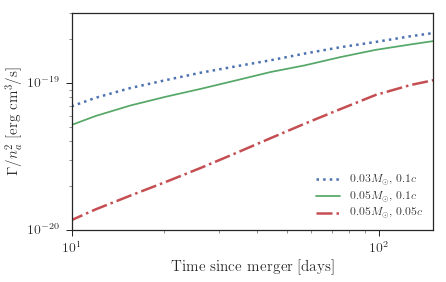

In [87]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(10.,150.)
plt.ylim(1.0e-20,3.0e-19)
plt.ylabel(r"$\Gamma/n_{a}^2~[{\rm erg~cm^{3}/s}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(t_m003_01_04_n4,h_f_m003_01_04_n4,label='$0.03M_{\odot},\,0.1c$',linestyle=':',linewidth=2.5)
plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower right',fontsize=12.)
plt.savefig("heating_function_new.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [69]:
for i in range(0,len(tmp['t'])):
    den = th.calc_density(0.05*Msun,0.1*c,tmp['t'][i]*day,alpha_max,alpha_min,n)/(150.*mu)
    print tmp['t'][i],den

0.01 649269414392842.6
0.013 295525450338116.9
0.016900000000000002 134513177213526.1
0.02197 61225843064873.04
0.028561 27867930389109.273
0.0371293 12684538183481.69
0.04826809 5773572227347.147
0.062748517 2627934559557.1904
0.0815730721 1196146818187.1602
0.10604499373000001 544445524891.7431
0.137858491849 247813165631.19855
0.17921603940370004 112796160960.94608
0.23298085122481008 51340992699.56577
0.3028751065922531 23368681246.95758
0.3937376385699291 10636632338.16912
0.5118589301409079 4841434837.582667
0.6654166091831801 2203657185.9729953
0.8650415919381342 1003030125.6135613
1.1245540695195746 456545346.2055353
1.461920290375447 207803980.97657508
1.900496377488081 94585334.9916136
2.4706452907345056 43052041.41630112
3.2118388779548575 19595831.32284984
4.175390541341315 8919358.817865198
5.4280077037437096 4059790.085509876
7.056410014866823 1847878.9647291193
9.17333301932687 841091.9275052882
11.925332925124932 382836.56236016756
15.502932802662412 174254.23867099115


In [70]:
th.calc_density(0.05*Msun,0.1*c,30.*day,alpha_max,alpha_min,n)/(150.*mu)

24047.015347883065

In [15]:
fIa= pd.read_csv('../SNIa/heat_M005_v01_v04_n4_new.dat',delim_whitespace=True,header=None)
#f88_140 = pd.read_csv('heat88_140_M005_v01_v04_n45.dat',delim_whitespace=True,header=None)
f88_238 = pd.read_csv('heat88_238_M005_v01_v04_n45.dat',delim_whitespace=True,header=None)
f141_238 = pd.read_csv('heat141_238_M005_v01_v04_n45.dat',delim_whitespace=True,header=None)
fwu = pd.read_csv('../Moment_method_alpha/heat_wu_M005_v01_v04_n4.dat',delim_whitespace=True)

In [16]:
def hb(x):
    return 1.0e10*np.power(x,-1.3333)

def hb2(x):
    return 1.0e9*np.power(x*0.1,-2.8)

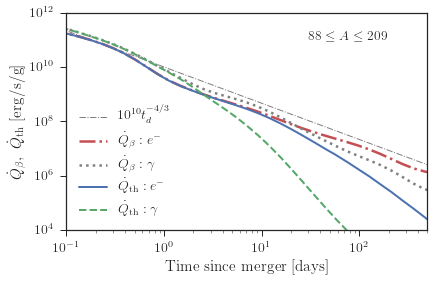

In [41]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,500.)
plt.ylim(1.0e4,1.0e12)
plt.ylabel(r"$\dot{Q}_{\beta},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(f88_238[0],hb(f88_238[0]),label=r'$10^{10}t_d^{-4/3}$',linestyle='-.',linewidth=1.,color='grey')
#plt.loglog(f88_140[0],hb2(f88_140[0]),label=r'$10^{9}t_{10d}^{-2.8}$',linestyle='-.',linewidth=2.,color='grey')
#plt.loglog(f88_140[0],f88_140[2]+f88_140[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 140$',linestyle=':',linewidth=2.5,color='C0')
plt.loglog(f88_238[0],f88_238[3],label=r'$\dot{Q}_{\beta}:e^{-}$',linestyle='-.',linewidth=2.5,color='C2')
plt.loglog(f88_238[0],f88_238[2],label=r'$\dot{Q}_{\beta}:\gamma$',linestyle=':',linewidth=2.5,color='grey')



#plt.loglog(f141_238[0],f141_238[2]+f141_238[3],label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')

#plt.loglog(f88_140[0],f88_140[4]+f88_140[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 140$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(f88_238[0],f88_238[5],label=r'$\dot{Q}_{\rm th}:e^{-}$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(f88_238[0],f88_238[4],label=r'$\dot{Q}_{\rm th}:\gamma$',linestyle='--',linewidth=2.,color='C1')

#plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C0')



#plt.loglog(f141_238[0],f141_238[4]+f141_238[5],label=r'$\dot{Q}_{\rm th}:141\leq A\leq 209$',linestyle='-',linewidth=2.,color='C1')

plt.text(30,1.0e11,'$88\leq A\leq 209$',fontsize=13.5)

#plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower left',fontsize=14)
plt.savefig("heat_A88.pdf",dpi=600,bbox_inches='tight')
plt.show()

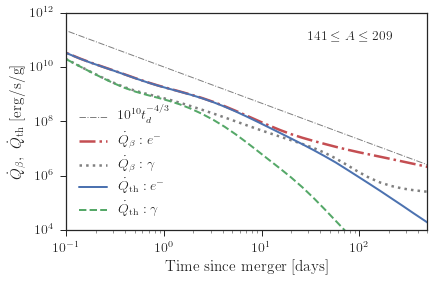

In [42]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,500.)
plt.ylim(1.0e4,1.0e12)
plt.ylabel(r"$\dot{Q}_{\beta},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(f141_238[0],hb(f141_238[0]),label=r'$10^{10}t_d^{-4/3}$',linestyle='-.',linewidth=1.,color='grey')
#plt.loglog(f88_140[0],hb2(f88_140[0]),label=r'$10^{9}t_{10d}^{-2.8}$',linestyle='-.',linewidth=2.,color='grey')
#plt.loglog(f88_140[0],f88_140[2]+f88_140[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 140$',linestyle=':',linewidth=2.5,color='C0')
plt.loglog(f141_238[0],f141_238[3],label=r'$\dot{Q}_{\beta}:e^{-}$',linestyle='-.',linewidth=2.5,color='C2')
plt.loglog(f141_238[0],f141_238[2],label=r'$\dot{Q}_{\beta}:\gamma$',linestyle=':',linewidth=2.5,color='grey')



#plt.loglog(f141_238[0],f141_238[2]+f141_238[3],label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')

#plt.loglog(f88_140[0],f88_140[4]+f88_140[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 140$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(f141_238[0],f141_238[5],label=r'$\dot{Q}_{\rm th}:e^{-}$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(f141_238[0],f141_238[4],label=r'$\dot{Q}_{\rm th}:\gamma$',linestyle='--',linewidth=2.,color='C1')

#plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C0')



#plt.loglog(f141_238[0],f141_238[4]+f141_238[5],label=r'$\dot{Q}_{\rm th}:141\leq A\leq 209$',linestyle='-',linewidth=2.,color='C1')

plt.text(30,1.0e11,'$141\leq A\leq 209$',fontsize=13.5)

#plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower left',fontsize=14)
plt.savefig("heat_A141.pdf",dpi=600,bbox_inches='tight')
plt.show()

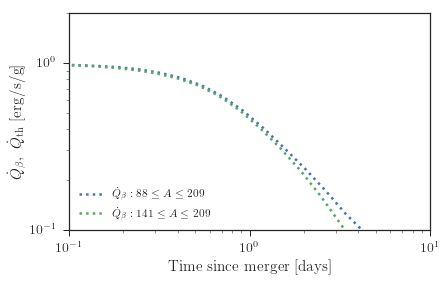

In [24]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,10.)
plt.ylim(0.1,2.0)
plt.ylabel(r"$\dot{Q}_{\beta},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
#plt.loglog(f88_140[0],hb(f88_140[0]),label=r'$10^{10}t_d^{-4/3}$',linestyle='-.',linewidth=2.,color='grey')
#plt.loglog(f88_140[0],hb2(f88_140[0]),label=r'$10^{9}t_{10d}^{-2.8}$',linestyle='-.',linewidth=2.,color='grey')
#plt.loglog(f88_140[0],f88_140[2]+f88_140[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 140$',linestyle=':',linewidth=2.5,color='C0')
plt.loglog(f88_238[0]/30.,(f88_238[5])/(f88_238[3]),label=r'$\dot{Q}_{\beta}:88\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C0')
plt.loglog(f141_238[0]/30,(f141_238[5])/(f141_238[3]),label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')
#plt.loglog(f141_238[0]/45,0.4,label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')


#plt.loglog(f88_140[0],f88_140[4]+f88_140[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 140$',linestyle='-',linewidth=2.,color='C0')
#plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C0')
#plt.loglog(f141_238[0],f141_238[4]+f141_238[5],label=r'$\dot{Q}_{\rm th}:141\leq A\leq 209$',linestyle='-',linewidth=2.,color='C1')



#plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower left',fontsize=11.5)
plt.savefig("tmp_f.pdf",dpi=600,bbox_inches='tight')
plt.show()

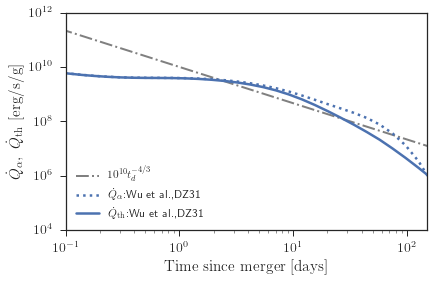

In [38]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,150.)
plt.ylim(1.0e4,1.0e12)
plt.ylabel(r"$\dot{Q}_{\alpha},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(fwu['t'],hb(fwu['t']),label=r'$10^{10}t_d^{-4/3}$',linestyle='-.',linewidth=2.,color='grey')
plt.loglog(fwu['t'],fwu['alpha']+fwu['gamma']+fwu['electron'],label=r'$\dot{Q}_{\alpha}$:Wu et al.,DZ31',linestyle=':',linewidth=2.5,color='C0')
#plt.loglog(f88_238[0],f88_238[2]+f88_238[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C2')
#plt.loglog(f141_238[0],f141_238[2]+f141_238[3],label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')
plt.loglog(fwu['t'],fwu['alpha_th']+fwu['gamma_th']+fwu['electron_th'],label=r'$\dot{Q}_{\rm th}$:Wu et al.,DZ31',linestyle='-',linewidth=2.5,color='C0')


#plt.loglog(f88_140[0],f88_140[4]+f88_140[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 140$',linestyle='-',linewidth=2.,color='C0')
#plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C2')
#plt.loglog(f141_238[0],f141_238[4]+f141_238[5],label=r'$\dot{Q}_{\rm th}:141\leq A\leq 209$',linestyle='-',linewidth=2.,color='C1')



#plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower left',fontsize=11.5)
plt.savefig("heat_alpha.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [107]:
def f_ed(t):
    return 1.0e6*np.power(t/200.,-3.)

In [116]:
chi =2.
H_Ia = []
time_Ia = []
for i in range(0,len(fIa)):
    posi_heat = fIa[3][i]
    time = fIa[0][i]
    density_Ia = f_ed(time)
    H_Ia.append(posi_heat*56.*mu/(density_Ia/chi))
    time_Ia.append(time)

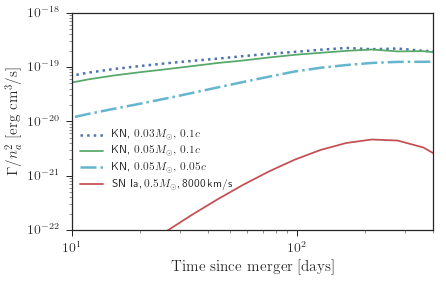

In [143]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(10.,400.)
plt.ylim(1.0e-22,1.0e-18)
plt.ylabel(r"$\Gamma/n_{a}^2~[{\rm erg~cm^{3}/s}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")

plt.loglog(t_m003_01_04_n4,h_f_m003_01_04_n4,label='KN, $0.03M_{\odot},\,0.1c$',linestyle=':',linewidth=2.5)
plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='KN, $0.05M_{\odot},\,0.1c$',linestyle='-')
plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='KN, $0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C5')
plt.loglog(time_Ia,H_Ia,label='SN Ia,\,$0.5M_{\odot}$,\,8000\,km/s')
plt.legend(loc=(0.01,0.16),fontsize=11.5)
plt.savefig("heating_function_with_Ia.pdf",dpi=600,bbox_inches='tight')
plt.show()

NameError: name 'f88_140' is not defined

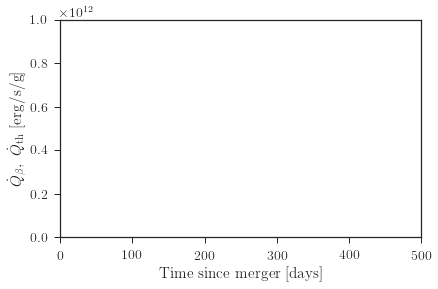

In [5]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,500.)
plt.ylim(1.0e4,1.0e12)
plt.ylabel(r"$\dot{Q}_{\beta},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(f88_140[0],hb(f88_140[0]),label=r'$10^{10}t_d^{-4/3}$',linestyle='-.',linewidth=2.,color='grey')
plt.loglog(f88_140[0],hb2(f88_140[0]),label=r'$10^{9}t_{10d}^{-2.8}$',linestyle='-.',linewidth=2.,color='grey')
#plt.loglog(f88_140[0],f88_140[2]+f88_140[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 140$',linestyle=':',linewidth=2.5,color='C0')
plt.loglog(f88_238[0],f88_238[2]+f88_238[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C0')
plt.loglog(f141_238[0],f141_238[2]+f141_238[3],label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')

#plt.loglog(f88_140[0],f88_140[4]+f88_140[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 140$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(f141_238[0],f141_238[4]+f141_238[5],label=r'$\dot{Q}_{\rm th}:141\leq A\leq 209$',linestyle='-',linewidth=2.,color='C1')



#plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower left',fontsize=11.5)
#plt.savefig("heat_v3.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [122]:
v= 5.0e8
print 3.*0.5*Msun/(4.*pi*np.power(v*200.*day,3.)*56.*mu)

3957568.0780481733


In [27]:
fQth141_238 = pd.read_csv('Qth141_238.txt',delim_whitespace=True,header=None,skiprows=range(0,2))

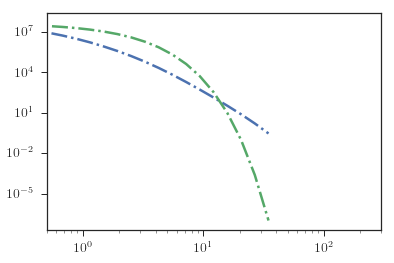

In [33]:
#plt.loglog(f141_238[0],f141_238[4],label='KN, $0.03M_{\odot},\,0.1c$',linestyle=':',linewidth=2.5)
#plt.loglog(fQth141_238[0],fQth141_238[2]/(0.05*Msun),label='KN, $0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(tmp['t'],tmp['gamma_th'],label='KN, $0.03M_{\odot},\,0.1c$',linestyle='-.',linewidth=2.5)
#plt.ylim(0.01,2.)
plt.xlim(0.5,300.)
plt.loglog(tmp_f['t']/85.,np.array(tmp_f['electron_th']),label='KN, $0.05M_{\odot},\,0.1c$',linestyle='-.',linewidth=2.5)
plt.loglog(tmp_f['t']/85.,np.array(tmp_f['electron']),label='KN, $0.03M_{\odot},\,0.1c$',linestyle='-.',linewidth=2.5)

plt.savefig('tmp.pdf')
plt.show()

In [285]:
th.calc_thermalization_time_sf(100.,Mej,vej,150.,alpha_max,alpha_min,n)/day

45.83859949031423

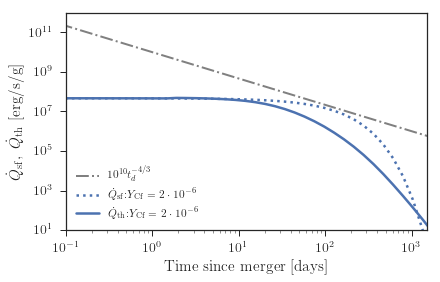

In [40]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,1500.)
plt.ylim(1.0e1,1.0e12)
plt.ylabel(r"$\dot{Q}_{\rm sf},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(tmp_f['t'],hb(tmp_f['t']),label=r'$10^{10}t_d^{-4/3}$',linestyle='-.',linewidth=2.,color='grey')
plt.loglog(tmp_f['t'],tmp_f['electron'],label=r'$\dot{Q}_{\rm sf}$:$Y_{\rm Cf}=2\cdot 10^{-6}$',linestyle=':',linewidth=2.5,color='C0')
#plt.loglog(f88_238[0],f88_238[2]+f88_238[3],label=r'$\dot{Q}_{\beta}:88\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C2')
#plt.loglog(f141_238[0],f141_238[2]+f141_238[3],label=r'$\dot{Q}_{\beta}:141\leq A\leq 209$',linestyle=':',linewidth=2.5,color='C1')
plt.loglog(tmp_f['t'],tmp_f['electron_th'],label=r'$\dot{Q}_{\rm th}$:$Y_{\rm Cf}=2\cdot 10^{-6}$',linestyle='-',linewidth=2.5,color='C0')


#plt.loglog(f88_140[0],f88_140[4]+f88_140[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 140$',linestyle='-',linewidth=2.,color='C0')
#plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C2')
#plt.loglog(f141_238[0],f141_238[4]+f141_238[5],label=r'$\dot{Q}_{\rm th}:141\leq A\leq 209$',linestyle='-',linewidth=2.,color='C1')



#plt.loglog(t_m005_01_04_n4,h_f_m005_01_04_n4,label='$0.05M_{\odot},\,0.1c$',linestyle='-')
#plt.loglog(t_m005_005_02_n4,h_f_m005_005_02_n4,label='$0.05M_{\odot},\,0.05c$',linestyle='-.',linewidth=2.5,color='C2')
plt.legend(loc='lower left',fontsize=11.5)
plt.savefig("heat_sf_v2.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [307]:
def fp(x):
    return 100.*np.power(x/1000.,-5)

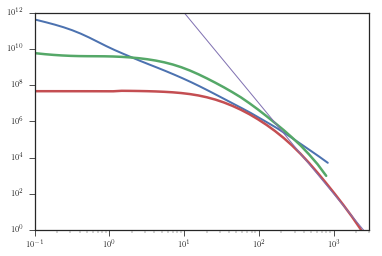

In [309]:
plt.xlim(0.1,3000.)
plt.ylim(1.0,1.0e12)
plt.loglog(f88_238[0],f88_238[4]+f88_238[5],label=r'$\dot{Q}_{\rm th}:88\leq A\leq 209$',linestyle='-',linewidth=2.,color='C0')

plt.loglog(fwu['t'],fwu['alpha_th']+fwu['gamma_th']+fwu['electron_th'],label=r'$\dot{Q}_{\rm th}$:Wu et al.,DZ31',linestyle='-',linewidth=2.5,color='C1')


plt.loglog(tmp_f['t'],tmp_f['electron_th'],label=r'$\dot{Q}_{\rm th}$:$Y_{\rm Cf}=2\cdot 10^{-6}$',linestyle='-',linewidth=2.5,color='C2')
plt.loglog(tmp_f['t'],fp(np.array(tmp_f['t'])),label=r'$\dot{Q}_{\rm th}$:$Y_{\rm Cf}=2\cdot 10^{-6}$',linestyle='-',linewidth=1,color='C3')


plt.show()


In [38]:
def integ(x,taubar):
    return x*x*np.exp(-0.5/(x*x)-x/taubar)

In [39]:
th = 45.*day
tau = 60.*day/np.log(2.)
taubar = tau/th

In [40]:
taubar

1.9235933878519513

In [89]:
x = 0.01
dx = 0.003
tmp2 = 0.
tmp2s =[]
tmp3s=[]
tmp4s =[]
tmp5s = []
xs = []
for i in range(0,1000):
    tmp = (integ(x,taubar))*dx
   
    tmp3 = np.power(x,-5.)*np.exp(0.5/(x*x))#*tmp2

    tmp4 = np.exp(-x/taubar)
    xs.append(x)
    tmp2s.append(tmp2)
    tmp3s.append(tmp3)
    tmp4s.append(tmp4)
    tmp2 += tmp
    x += dx

/Users/kentahotokezaka/.pyenv/versions/anaconda2-5.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in exp


/Users/kentahotokezaka/.pyenv/versions/anaconda2-5.0.0/lib/python2.7/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


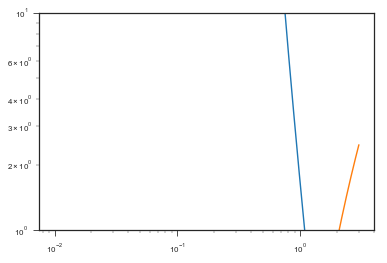

In [91]:
#plt.ylim(5.0e-1,2)
plt.loglog(xs,tmp3s)
plt.loglog(xs,tmp2s)
plt.show()

In [171]:
def ep(tau,tau0,a):
    x = tau/tau0
    tmp = 1.+(1.-a)*np.power(tau0,-2.)*(-1.+np.power(x,-2.*(a-1.)-2.))/(2.*(a-1.)+2.)
    tmpp = 1./(1.-a)
    #print tmp
    tmppp = np.power(x,-2.)*np.power(tmp,tmpp)
    return tmppp
    #if(tmppp<=1.):
    #    return tmppp
    #else:
    #    return 0.

In [207]:
a = 0.9
tau0 = 1.
taups = []
es = []
thes = []
dtau = tau0*0.1
for i in range(0,100):
    tau = tau0+dtau*float(i)
    taups.append(tau)
    ee = ep(tau,tau0,a)
    ee = ep1(tau,tau0)
    es.append(ee)
    thes.append(np.power(ee,a)*np.power(tau,-3.))
taus = np.array(taups)
e1s = np.array(es)
t1s= np.array(thes)

In [173]:
ep(tau0+1.0,tau0,a)

0.013266432417291373

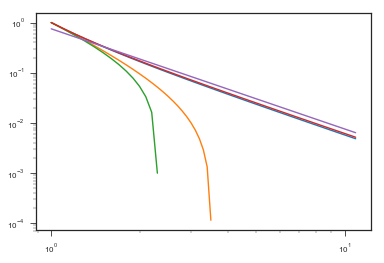

In [208]:
plt.loglog(taus,e09s)
plt.loglog(taus,e01s)
plt.loglog(taus,em01s)
plt.loglog(taus,e1s)
plt.loglog(taus,0.75/(taus*taus))
plt.show()

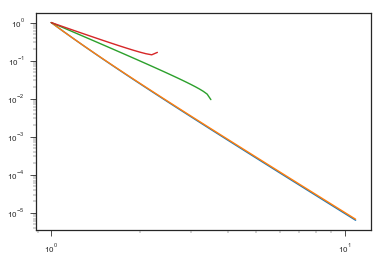

In [209]:
plt.loglog(taus,t09s)
plt.loglog(taus,t1s)
plt.loglog(taus,t01s)
plt.loglog(taus,tm01s)
plt.show()

In [206]:
def ep1(tau,tau0):
    return np.power(tau/tau0,-2.)*(np.exp(0.5/(tau*tau)-0.5/(tau0*tau0)))

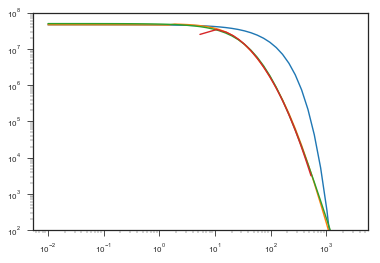

In [113]:
plt.ylim(100.0,1.0e8)
plt.loglog(tmp_f['t'],tmp_f['electron'])
plt.loglog(tmp_f['t'],tmp_f['electron_th'])
plt.loglog(tmp_f['t'],fff(np.array(tmp_f['t'])))
plt.loglog(ttts,np.multiply(integs,5.0e7))
plt.show()

In [48]:
def fff(x):
    return 5.0e7/np.power(( 1.+ np.power(x/90.,5./4.5)),4.5)

In [105]:
def fs(x):
    a = 1.5
    #return x*x*np.exp(-x/a)
    return x*x*np.exp(-x/a-0.5/x/x)

In [112]:
integs = []
ttts = []
for j in range(1,100):
    tmax = float(j)*0.1
    t = 0.01
    dt = 0.001
    integ = 0.
    while(t<tmax):
        tmp = fs(t)
        integ += tmp*dt
        t += dt
    ttts.append(tmax*ttt)
    #integs.append(integ/np.power(tmax,5.))
    integs.append(integ*np.exp(0.5/tmax/tmax)/np.power(tmax,5.))

In [58]:
ttt = th.calc_thermalization_time_sf(100.,Mej,vej,100.,alpha_max,alpha_min,n)/day

In [48]:
def calc_thermalization_time(E0,Mej,vej,Aave,alpha_max,alpha_min,n):
    vmax = alpha_max*vej
    vmin = alpha_min*vej
    kappa_beta = 1.0#calc_kappa_beta(E0)
    rho_inv = (1.-np.power(alpha_max,-n+3.))/(n-3.)+0.5*(1.-alpha_min*alpha_min)
    tmp = ((1.0-np.power(alpha_max,-2.*n+3.))/(2.*n-3.) + 1.-alpha_min)/(rho_inv*rho_inv)
    tmp2 = (n-3.)*(n-3.)*(1.0-np.power(alpha_max,-2.*n+3.))/((1.-np.power(alpha_max,-n+3.))*(1.-np.power(alpha_max,-n+3.)))/(2.*n-3.)
    gamma_ad = 5./43.#calc_ad(E0)
    te2 = tmp*kappa_beta*c*Mej/(4.*np.pi*E0*vej*vej*vej*3.0*(gamma_ad-1.))
    print tmp/(4.0*pi)
    k = n-3.
    w = alpha_min/alpha_max
    print k/(4.*np.pi*(2.+3./k)*(1.0-np.power(w,k)))
    print k*k*(1./(1-np.power(w,k)))*(1./(1-np.power(w,k)))*(1.-np.power(w,2.*k+3.))/(4.*np.pi)/(2.*k+3.)
    print k*k*(1./(1-np.power(w,k)))*(1./(1-np.power(w,k)))/(4.*np.pi)/(2.*k+3.)
    print k*k*(1./(1-2.*np.power(w,k)))/(4.*np.pi)/(2.*k+3.)
    print k/(2.+3./k)/(4.*pi), "waxman"
    return 1.0

In [51]:
calc_thermalization_time(1.0,0.05*Msun,0.1*c,150.0,4.0,1.0,4.67)

0.043090551964102795
0.03884105619817306
0.0430905519641028
0.0430971192798458
0.043620874565676274
0.0350053013241 waxman


1.0